In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

train = pd.read_csv('train.csv', index_col = "PassengerId")
test = pd.read_csv('test.csv', index_col = "PassengerId")

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [2]:
print('train', train.shape)
print('test', test.shape)

train (891, 11)
test (418, 10)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [5]:
# train 데이터를 기준으로 나이와의 상관관계를 확인 : .corr
train.corr(numeric_only = True)

# train.corr() -> 구버전
# train.corr(numeric_only = True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
pt1 = train.pivot_table (values = "Age", index = ["Pclass", "Sex"], aggfunc = "mean")
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [7]:
def fill_age(data) : # 매개변수 data에는 train 혹은 test가 들어가게 됨 
# 만약에 Age 컬럼에 결측치가 있다면 피벗테이블에서 값을 가져오고 
    if pd.isna(data['Age']):
        return pt1.loc[(data['Pclass'], data['Sex']), 'Age']
# 결측치가 없다면 원래 나이값을 그대로 사용
    else: 
        return data['Age']

In [8]:
train['Age'] = train.apply(fill_age, axis = 1).astype('int64')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [10]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
train['Embarked'] = train['Embarked'].fillna('S')

In [12]:
# train, test 데이터에서 Cabin 컬럼의 결측치들을 임의의 문자 ‘M'으로 채운 후 
# Deck이라는 새로운 컬럼 생성

train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [13]:
# Deck 칼럼에서 str 키워드를 활용해 알파벳만 가져오기

train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [14]:
# train, test 데이터에서 기존에 있던 Cabin컬럼 삭제

train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


<Axes: xlabel='Deck', ylabel='count'>

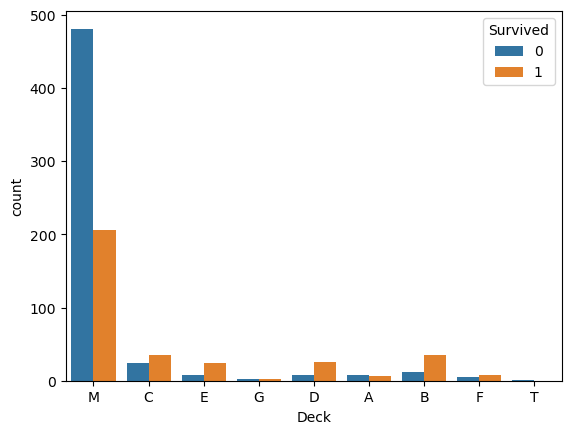

In [15]:
sns.countplot(data = train, x = 'Deck', hue = 'Survived')

<Axes: xlabel='Pclass', ylabel='count'>

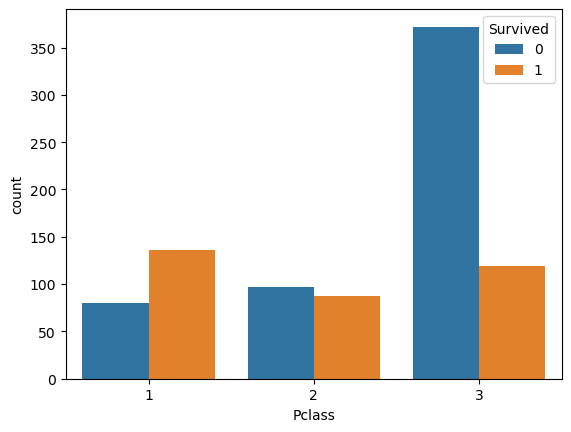

In [16]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

<Axes: xlabel='Deck', ylabel='count'>

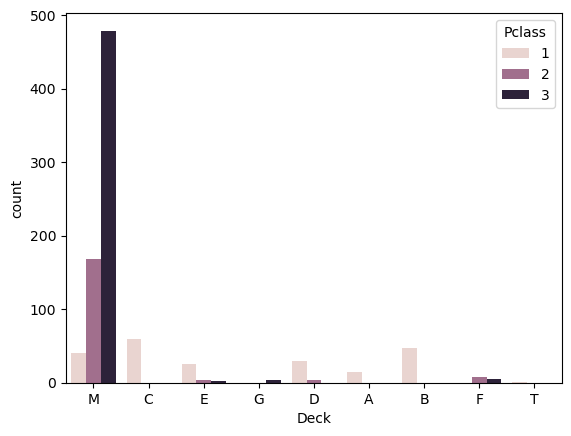

In [17]:
sns.countplot(data = train, x = 'Deck', hue = 'Pclass')

<Axes: xlabel='Sex', ylabel='count'>

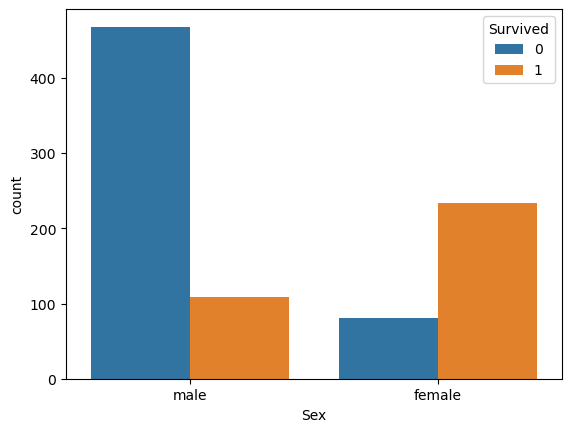

In [18]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

In [19]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

In [20]:
bins = [0, 1, 4, 20]
labels = ['Alone', 'Small', 'Large']
train_cut = pd.cut(train['Family_Size'], bins = bins, labels = labels)
train_cut

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Size, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

<Axes: xlabel='Family_Group', ylabel='count'>

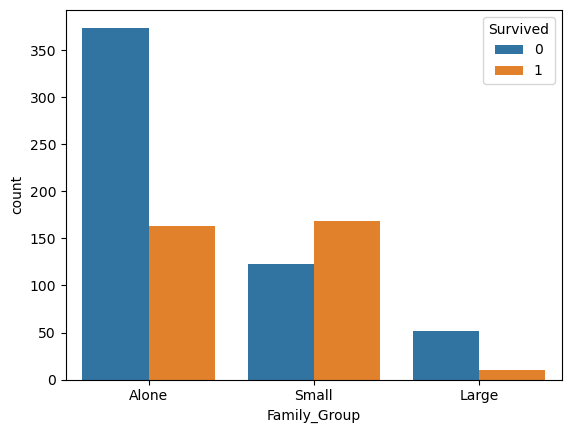

In [21]:
test_cut = pd.cut(test['Family_Size'], bins = bins, labels = labels)

train['Family_Group'] = train_cut
test['Family_Group'] = test_cut

sns.countplot(data = train, x = 'Family_Group', hue = 'Survived')

In [22]:
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [23]:
# 피쳐 및 타겟 지정

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck', 'Family_Group']
X = train[features]
y = train['Survived']
X_test_final = test[features]

In [24]:
# 범주형 컬럼을 카테고리 타입으로 변환
cat_cols = ['Sex', 'Embarked', 'Deck', 'Family_Group', 'Pclass']
for col in cat_cols:
    X.loc[:, col] = X[col].astype('category')
    X_test_final.loc[:, col] = X_test_final[col].astype('category')

# train/validation 분할
X_train, X_val, y_train, y_val = train_test_split(
X, y, test_size = 0.2, random_state = 42, stratify = y)

In [25]:
# 파라미터 그리드 설정

param_grid = {
    'max_depth' : [3, 5, 7],
    'learning_rate' : [0.01, 0.1, 0.3],
    'n_estimators' : [50, 100, 200]
    }

# XGBoost 모델 생성 (categorical 지원)

model = XGBClassifier(
    enable_categorical=True,
    tree_method="hist",
    random_state=42,
    eval_metric='logloss'
)

In [26]:
# GridSearchCV로 파라미터 탐색

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2
)

grid_search.fit(X_train, y_train)

# 최적 파라미터 및 성능 출력
#print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Best ROC AUC (CV): {grid_search.best_score_:.4f}")
print(grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\data.py", line 407, in pandas_feature_info
    new_feature_types.append(_pandas_dtype_mapper[dtype.name])
                             ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'object'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\cutea\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1663, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 628, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1137, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\core.py", line 1614, in __init__
    self._init(
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\core.py", line 1678, in _init
    it.reraise()
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\core.py", line 572, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\core.py", line 553, in _handle_exception
    return fn()
           ^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\core.py", line 640, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\data.py", line 1654, in next
    input_data(**self.kwargs)
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\core.py", line 620, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\data.py", line 1707, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\data.py", line 640, in _transform_pandas_df
    feature_names, feature_types = pandas_feature_info(
                                   ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\data.py", line 409, in pandas_feature_info
    _invalid_dataframe_dtype(data)
  File "C:\Users\cutea\anaconda3\Lib\site-packages\xgboost\data.py", line 372, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Sex: object, Embarked: object, Deck: object, Family_Group: category


In [ ]:
# 검증셋 평가

best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Validation ROC AUC: {roc_auc_score(y_val, y_val_pred):.4f}")

In [ ]:
# 실험 결과 시각화 (learning_rate=0.1 기준)

results = pd.DataFrame(grid_search.cv_results_)
pivot = pd.pivot_table(
    results[results['param_learning_rate'] == 0.1],
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score'
)
sns.heatmap(pivot, annot=True, cmap =  'Wistia', fmt=".3f")
plt.title('ROC AUC Scores for Parameter Combinations (learning_rate=0.1)')
plt.show()

In [ ]:
for lr in param_grid['learning_rate']:
    subset = results[results['param_learning_rate'] == lr]
    plt.plot(subset['param_n_estimators'], 
             subset['mean_test_score'], 
             label=f'lr={lr}', 
             marker='o')

plt.title('Learning Rate vs n_estimators (ROC AUC)')
plt.xlabel('n_estimators')
plt.ylabel('ROC AUC')
plt.legend()
plt.grid(True)
plt.show()

# 1. Tree의 깊이가 깊다고 성능이 오르는건 아니다 (오히려 모든 케이스에서 성능이 떨어짐 --> 과적합 위험)
# 2. n_estimator도 갯수가 많다고 성능이 오르는건 아님 ( 오히려 depth = 7 에서는 estimator가 가장 적을 때 성능이 가장 높음)
# 적당한 깊이와 적당한 넓이일때 .. 성능이 좋다 (근데 이건 데이터가 간단해서 가능할수도)
# 데이터가 작을때는 그리드 서치가 효과적인것 같음!!

In [ ]:
# 테스트 데이터셋 예측 및 제출 파일 생성
test_pred = best_model.predict(X_test_final)
submission = pd.DataFrame({
    'PassengerId': test['Name'],
    'Survived': test_pred
})

submission.to_csv('submission.csv', index=False)